<a href="https://colab.research.google.com/github/Trung0Minh/AIO2023-MODULE-5/blob/main/optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimizers

In [1]:
import numpy as np

$f(w_{1}, w_{2}) = 0.1w_{1}^2 + 2w_{2}^2$

In [2]:
def df_w(W):
    dW = np.array([0.2*W[0], 4*W[1]])
    return dW

## Gradient Descent

In [3]:
def sgd(W, dW, lr):
    W = W - lr * dW
    return W

In [4]:
def train_p1(optimizer, lr, epochs):
    W = np.array([-5, 2], dtype=np.float32)
    result = [W]
    for _ in range(epochs):
        dW = df_w(W)
        W = optimizer(W, dW, lr)
        result.append(W)
    return result

In [5]:
train_p1(sgd, lr=0.4, epochs=30)

[array([-5.,  2.], dtype=float32),
 array([-4.6, -1.2]),
 array([-4.232,  0.72 ]),
 array([-3.89344, -0.432  ]),
 array([-3.5819648,  0.2592   ]),
 array([-3.29540762, -0.15552   ]),
 array([-3.03177501,  0.093312  ]),
 array([-2.78923301, -0.0559872 ]),
 array([-2.56609437,  0.03359232]),
 array([-2.36080682, -0.02015539]),
 array([-2.17194227,  0.01209324]),
 array([-1.99818689, -0.00725594]),
 array([-1.83833194,  0.00435356]),
 array([-1.69126538, -0.00261214]),
 array([-1.55596415,  0.00156728]),
 array([-1.43148702e+00, -9.40369969e-04]),
 array([-1.31696806e+00,  5.64221981e-04]),
 array([-1.21161061e+00, -3.38533189e-04]),
 array([-1.11468176e+00,  2.03119913e-04]),
 array([-1.02550722e+00, -1.21871948e-04]),
 array([-9.43466646e-01,  7.31231688e-05]),
 array([-8.67989314e-01, -4.38739013e-05]),
 array([-7.98550169e-01,  2.63243408e-05]),
 array([-7.34666155e-01, -1.57946045e-05]),
 array([-6.75892863e-01,  9.47676268e-06]),
 array([-6.21821434e-01, -5.68605761e-06]),
 array([-

## GD + Momentum

In [6]:
def sgd_momentum(W, dW, lr, V, beta):
    V = beta*V + (1 - beta)*dW
    W = W - lr*V
    return W, V

In [9]:
def train_p1(optimizer, lr, epochs):
    W = np.array([-5, -2], dtype=np.float32)
    V = np.array([0, 0], dtype=np.float32)
    beta = 0.9
    results = [W]

    for _ in range(epochs):
        dW = df_w(W)
        W, V = sgd_momentum(W, dW, lr, V, beta)
        results.append(W)
    return results

In [10]:
train_p1(sgd_momentum, lr=0.6, epochs=30)

[array([-5., -2.], dtype=float32),
 array([-4.94, -1.52]),
 array([-4.82672, -0.7232 ]),
 array([-4.66684736,  0.167488  ]),
 array([-4.46695982,  0.92891008]),
 array([-4.23345751,  1.39125153]),
 array([-3.97250394,  1.47345847]),
 array([-3.68997568,  1.19381468]),
 array([-3.39142054,  0.65561975]),
 array([-3.08202387,  0.01389557]),
 array([-2.76658258, -0.56699113]),
 array([-2.44948643, -0.95371129]),
 array([-2.13470605, -1.07286872]),
 array([-1.82578724, -0.92262192]),
 array([-1.52585086, -0.56597054]),
 array([-1.23759791, -0.10915136]),
 array([-0.96331909,  0.32818222]),
 array([-0.70490831,  0.64301871]),
 array([-0.46387971,  0.77204706]),
 array([-0.24138742,  0.70288128]),
 array([-0.03824771,  0.47194058]),
 array([0.14503701, 0.1508282 ]),
 array([ 0.30825281, -0.17437171]),
 array([ 0.45144799, -0.42520241]),
 array([ 0.57490629, -0.54890147]),
 array([ 0.67911987, -0.52849427]),
 array([ 0.76476266, -0.38328916]),
 array([ 0.83266402, -0.16061517]),
 array([0.883

## RMSProp

In [11]:
def RMSProp(W, dW, lr, S, gamma):
    epsilon = 1e-6
    S = gamma*S + (1 - gamma)*(dW**2)
    W = W - lr*(dW/np.sqrt(S + epsilon))
    return W, S

In [12]:
def train_p1(optimizer, lr, epochs):
    W = np.array([-5, -2], dtype=np.float32)
    S = np.array([0, 0], dtype=np.float32)
    gamma = 0.9
    results = [W]

    for _ in range(epochs):
        dW = df_w(W)
        W, S = RMSProp(W, dW, lr, S, gamma)
        results.append(W)
    return results

In [13]:
train_p1(RMSProp, lr=0.3, epochs=30)

[array([-5., -2.], dtype=float32),
 array([-4.05132145, -1.05131678]),
 array([-3.43519754, -0.59152343]),
 array([-2.95893693, -0.3294394 ]),
 array([-2.56546289, -0.17756482]),
 array([-2.22920552, -0.09163256]),
 array([-1.93626752, -0.04494499]),
 array([-1.67817686, -0.02081423]),
 array([-1.44934985, -0.00903559]),
 array([-1.24588199, -0.00364591]),
 array([-1.06490301, -0.00135351]),
 array([-9.04202260e-01, -4.56444431e-04]),
 array([-7.61996495e-01, -1.37562928e-04]),
 array([-6.36778499e-01, -3.62601019e-05]),
 array([-5.27215237e-01, -8.11337456e-06]),
 array([-4.32078505e-01, -1.47473412e-06]),
 array([-3.50198507e-01, -2.02783991e-07]),
 array([-2.80434649e-01, -1.84231187e-08]),
 array([-2.21659834e-01, -7.67742748e-10]),
 array([-1.72755512e-01,  7.80451998e-12]),
 array([-1.32615134e-01, -5.05794800e-13]),
 array([-1.00153779e-01,  6.19123501e-14]),
 array([-7.43217708e-02, -1.13373781e-14]),
 array([-5.41201278e-02,  2.80166702e-15]),
 array([-3.86159157e-02, -8.81341

## Adam

In [14]:
def Adam(W, dW, lr, V, S, beta1, beta2, t):
    epsilon = 1e-6
    V = beta1*V + (1 - beta1)*dW
    S = beta2*S + (1 - beta2)*(dW**2)
    V_corr = V/(1 - beta1**t)
    S_corr = S/(1 - beta2**t)
    W = W - lr*(V_corr/(np.sqrt(S_corr) + epsilon))
    return W, V, S

In [17]:
def train_p1(optimizer, lr, epochs):
    W = np.array([-5, -2], dtype=np.float32)
    V = np.array([0, 0], dtype=np.float32)
    S = np.array([0, 0], dtype=np.float32)
    beta1 = 0.9
    beta2 = 0.999
    t = 1
    results = [W]

    for _ in range(epochs):
        dW = df_w(W)
        W, V, S = Adam(W, dW, lr, V, S, beta1, beta2, t)
        results.append(W)
    return results

In [18]:
train_p1(Adam, lr=0.2, epochs=30)

[array([-5., -2.], dtype=float32),
 array([-4.8000002 , -1.80000002]),
 array([-4.53157446, -1.53234021]),
 array([-4.2198145 , -1.22391458]),
 array([-3.87886593, -0.8920874 ]),
 array([-3.5184822 , -0.55167136]),
 array([-3.14612788, -0.21734608]),
 array([-2.7679101 ,  0.09556942]),
 array([-2.38906471,  0.37175056]),
 array([-2.01423269,  0.5978378 ]),
 array([-1.64762053,  0.76489708]),
 array([-1.29308728,  0.8698814 ]),
 array([-0.95417995,  0.91525602]),
 array([-0.63413034,  0.90733373]),
 array([-0.33582336,  0.85443713]),
 array([-0.06174675,  0.76556849]),
 array([0.18606706, 0.64967888]),
 array([0.40609556, 0.51535336]),
 array([0.59736657, 0.37070313]),
 array([0.75947608, 0.22331396]),
 array([0.89257921, 0.08016373]),
 array([ 0.99735438, -0.05252633]),
 array([ 1.07494495, -0.16949778]),
 array([ 1.12688525, -0.2666743 ]),
 array([ 1.15501888, -0.34133181]),
 array([ 1.16141666, -0.39216583]),
 array([ 1.14829976, -0.41923376]),
 array([ 1.11797166, -0.42378827]),
 ar

# Adam Implementation on Pytorch

In [19]:
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision.datasets import FashionMNIST
import torchvision.transforms as transforms
import numpy as np
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.manual_seed(42)

In [20]:
batch_size = 512
num_epochs = 300
lr = 0.01

In [21]:
train_dataset = FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
test_dataset = FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
test_loader = DataLoader(test_dataset, batch_size)

100%|██████████| 26.4M/26.4M [00:01<00:00, 19.5MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 332kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 6.11MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 7.56MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [22]:
class MLP(nn.Module):
    def __init__(self, input_dims, hidden_dims, output_dims):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_dims, hidden_dims)
        self.layer2 = nn.Linear(hidden_dims, hidden_dims)
        self.layer3 = nn.Linear(hidden_dims, hidden_dims)
        self.layer4 = nn.Linear(hidden_dims, hidden_dims)
        self.layer5 = nn.Linear(hidden_dims, hidden_dims)
        self.output = nn.Linear(hidden_dims, output_dims)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = nn.Flatten()(x)
        x = self.layer1(x)
        x = self.sigmoid(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        x = self.layer3(x)
        x = self.sigmoid(x)
        x = self.layer4(x)
        x = self.sigmoid(x)
        x = self.layer5(x)
        x = self.sigmoid(x)
        out = self.output(x)
        return out

In [23]:
model = MLP(input_dims=784, hidden_dims=128, output_dims=10).to(device)
criterion = nn.CrossEntropyLoss()
################## YOUR CODE HERE ##################
"""Cấu hình optimizer theo yêu cầu đề bài"""
optimizer = optim.Adam(params=model.parameters(), lr=0.001)
####################################################

In [24]:
train_losses = []
train_acc = []
val_losses = []
val_acc = []
for epoch in range(num_epochs):
    model.train()
    t_loss = 0
    t_acc = 0
    cnt = 0
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        t_loss += loss.item()
        t_acc += (torch.argmax(outputs, 1) == y).sum().item()
        cnt += len(y)
    t_loss /= len(train_loader)
    train_losses.append(t_loss)
    t_acc /= cnt
    train_acc.append(t_acc)

    model.eval()
    v_loss = 0
    v_acc = 0
    cnt = 0
    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            outputs = model(X)
            loss = criterion(outputs, y)
            v_loss += loss.item()
            v_acc += (torch.argmax(outputs, 1)==y).sum().item()
            cnt += len(y)
    v_loss /= len(test_loader)
    val_losses.append(v_loss)
    v_acc /= cnt
    val_acc.append(v_acc)
    print(f"Epoch {epoch+1}/{num_epochs}, Train_Loss: {t_loss:.4f}, Train_Acc: {t_acc:.4f}, Validation Loss: {v_loss:.4f}, Val_Acc: {v_acc:.4f}")

Epoch 1/300, Train_Loss: 2.0233, Train_Acc: 0.1613, Validation Loss: 1.6895, Val_Acc: 0.1999
Epoch 2/300, Train_Loss: 1.5800, Train_Acc: 0.2655, Validation Loss: 1.4563, Val_Acc: 0.3730
Epoch 3/300, Train_Loss: 1.2253, Train_Acc: 0.4554, Validation Loss: 1.0929, Val_Acc: 0.5223
Epoch 4/300, Train_Loss: 0.9613, Train_Acc: 0.5902, Validation Loss: 0.8670, Val_Acc: 0.6651
Epoch 5/300, Train_Loss: 0.8068, Train_Acc: 0.6762, Validation Loss: 0.7778, Val_Acc: 0.6903
Epoch 6/300, Train_Loss: 0.7159, Train_Acc: 0.7368, Validation Loss: 0.6908, Val_Acc: 0.7676
Epoch 7/300, Train_Loss: 0.6423, Train_Acc: 0.7799, Validation Loss: 0.6395, Val_Acc: 0.7844
Epoch 8/300, Train_Loss: 0.5863, Train_Acc: 0.7973, Validation Loss: 0.5999, Val_Acc: 0.7959
Epoch 9/300, Train_Loss: 0.5442, Train_Acc: 0.8085, Validation Loss: 0.5674, Val_Acc: 0.8003
Epoch 10/300, Train_Loss: 0.5118, Train_Acc: 0.8161, Validation Loss: 0.5392, Val_Acc: 0.8072
Epoch 11/300, Train_Loss: 0.4869, Train_Acc: 0.8236, Validation Loss:

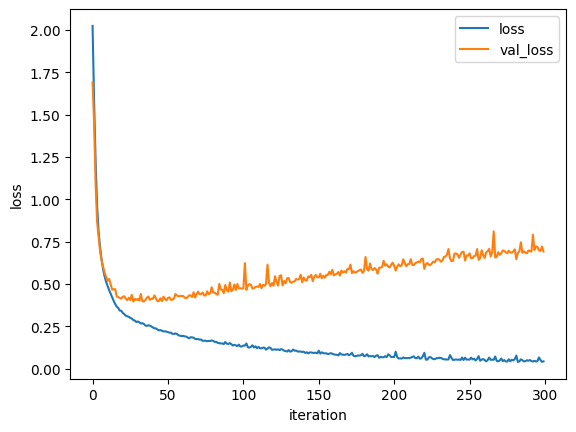

In [27]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='loss')
plt.plot(val_losses, label='val_loss')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend();